# Community state types (CST)

In [8]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11,8
import statsmodels.stats as stat
from statsmodels.stats.proportion import proportions_ztest
sns.set_style("whitegrid")

In [2]:
# Colors
#create your own color array
my_palette = ["grey", "#CBC3E3"]
# Functions
def highlight_cells(val):
    if type(val) == float:
        color = 'purple' if val < 0.05 else ''
        return 'background-color: {}'.format(color)

In [3]:
cst = pd.read_csv('community_state_types/cst_valencia.csv', sep=',',index_col=0)
display(cst)
cst_dummies = pd.read_csv('community_state_types/cst_valencia_dummies.csv', sep=',',index_col=0)
display(cst_dummies)

,CST,subCST,score,I-A_sim,I-B_sim,II_sim,III-A_sim,III-B_sim,IV-A_sim,IV-B_sim,IV-C0_sim,IV-C1_sim,IV-C2_sim,IV-C3_sim,IV-C4_sim,V_sim
specimen,,,,,,,,,,,,,,,,
A00001-05,III,III-B,0.868561,0.002266,0.045526,0.164564,0.805694,0.868561,0.066462,0.144935,0.113105,0.019802,0.014567,0.002000,0.139160,0.265682
A00002-01,III,III-A,0.000772,0.000009,0.000104,0.000451,0.000772,0.000740,0.000172,0.000214,0.000297,0.000051,0.000032,0.000010,0.000191,0.000657
A00003-02,II,II,0.001252,0.000002,0.000042,0.001252,0.000009,0.000015,0.000006,0.000020,0.000086,0.000030,0.000036,0.000014,0.000016,0.000071
A00004-08,III,III-A,0.996736,0.002449,0.043388,0.046478,0.996736,0.816134,0.053720,0.115648,0.076248,0.017566,0.011676,0.000935,0.122982,0.239510
A00004-12,III,III-A,0.957829,0.002385,0.043777,0.047363,0.957829,0.853364,0.057898,0.125207,0.084741,0.017835,0.011887,0.000952,0.129132,0.249143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J00111-01,III,III-A,0.990570,0.004976,0.045129,0.045368,0.990570,0.778906,0.051016,0.109562,0.071449,0.017204,0.011538,0.000925,0.118074,0.230769
J00112-01,I,I-A,0.963321,0.963321,0.953175,0.005574,0.012477,0.114151,0.002268,0.012967,0.047935,0.006936,0.027783,0.002759,0.009767,0.109528
J00113-01,III,III-B,0.522828,0.004978,0.035157,0.034497,0.512631,0.522828,0.046678,0.099839,0.071858,0.013059,0.008936,0.000738,0.096630,0.178766


,CST I-A,CST I-B,CST II,CST III-A,CST III-B,CST IV-A,CST IV-B,CST IV-C0,CST IV-C2,CST IV-C4,CST V
specimen,,,,,,,,,,,
A00001-05,0,0,0,0,1,0,0,0,0,0,0
A00002-01,0,0,0,1,0,0,0,0,0,0,0
A00003-02,0,0,1,0,0,0,0,0,0,0,0
A00004-08,0,0,0,1,0,0,0,0,0,0,0
A00004-12,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
J00111-01,0,0,0,1,0,0,0,0,0,0,0
J00112-01,1,0,0,0,0,0,0,0,0,0,0
J00113-01,0,0,0,0,1,0,0,0,0,0,0


In [5]:
# Metadata
metadata = pd.read_csv('metadata/metadata.csv',sep=',')
metadata = metadata.set_index('specimen',drop=True)
metadata['Type'] = ['Term' if i > 36 else 'Preterm' for i in metadata.delivery_wk]
metadata['trimester'] =  pd.cut(metadata.collect_wk,[0,13,26,42],labels=[1,2,3])
print(all(metadata.index == cst.index))
display(metadata)

True


,project,participant_id,was_term,delivery_wk,collect_wk,race,age,NIH Racial Category,NIH Ethnicity Category,was_preterm,was_early_preterm,Type,trimester
specimen,,,,,,,,,,,,,
A00001-05,A,A00001,False,38.0,33.0,American Indian,Unknown,American Indian or Alaska Native,Unknown,False,False,Term,3
A00002-01,A,A00002,False,40.0,38.0,White,Unknown,White,Unknown,False,False,Term,3
A00003-02,A,A00003,False,40.0,30.0,Asian-Japanese,Unknown,Asian,Unknown,False,False,Term,3
A00004-08,A,A00004,False,40.0,27.0,White,Unknown,White,Unknown,False,False,Term,3
A00004-12,A,A00004,False,40.0,29.0,White,Unknown,White,Unknown,False,False,Term,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
J00111-01,J,J00111,False,40.0,17.0,Caucasian,27,White,Unknown,False,False,Term,2
J00112-01,J,J00112,False,39.0,19.0,Caucasian,27,White,Unknown,False,False,Term,2
J00113-01,J,J00113,False,41.0,16.0,Caucasian,32,White,Unknown,False,False,Term,2


## Add the information from metadata to CST file

In [6]:
cst_meta = pd.concat([cst,metadata],axis=1)
cst_meta = cst_meta.query('collect_wk >= 6 and collect_wk <= 36')
cst_meta

,CST,subCST,score,I-A_sim,I-B_sim,II_sim,III-A_sim,III-B_sim,IV-A_sim,IV-B_sim,...,delivery_wk,collect_wk,race,age,NIH Racial Category,NIH Ethnicity Category,was_preterm,was_early_preterm,Type,trimester
specimen,,,,,,,,,,,,,,,,,,,,,
A00001-05,III,III-B,0.868561,0.002266,0.045526,0.164564,0.805694,0.868561,0.066462,0.144935,...,38.0,33.0,American Indian,Unknown,American Indian or Alaska Native,Unknown,False,False,Term,3
A00003-02,II,II,0.001252,0.000002,0.000042,0.001252,0.000009,0.000015,0.000006,0.000020,...,40.0,30.0,Asian-Japanese,Unknown,Asian,Unknown,False,False,Term,3
A00004-08,III,III-A,0.996736,0.002449,0.043388,0.046478,0.996736,0.816134,0.053720,0.115648,...,40.0,27.0,White,Unknown,White,Unknown,False,False,Term,3
A00004-12,III,III-A,0.957829,0.002385,0.043777,0.047363,0.957829,0.853364,0.057898,0.125207,...,40.0,29.0,White,Unknown,White,Unknown,False,False,Term,3
A00004-13,III,III-A,0.859384,0.002239,0.042509,0.046442,0.859384,0.835402,0.060120,0.130246,...,40.0,30.0,White,Unknown,White,Unknown,False,False,Term,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J00111-01,III,III-A,0.990570,0.004976,0.045129,0.045368,0.990570,0.778906,0.051016,0.109562,...,40.0,17.0,Caucasian,27,White,Unknown,False,False,Term,2
J00112-01,I,I-A,0.963321,0.963321,0.953175,0.005574,0.012477,0.114151,0.002268,0.012967,...,39.0,19.0,Caucasian,27,White,Unknown,False,False,Term,2
J00113-01,III,III-B,0.522828,0.004978,0.035157,0.034497,0.512631,0.522828,0.046678,0.099839,...,41.0,16.0,Caucasian,32,White,Unknown,False,False,Term,2


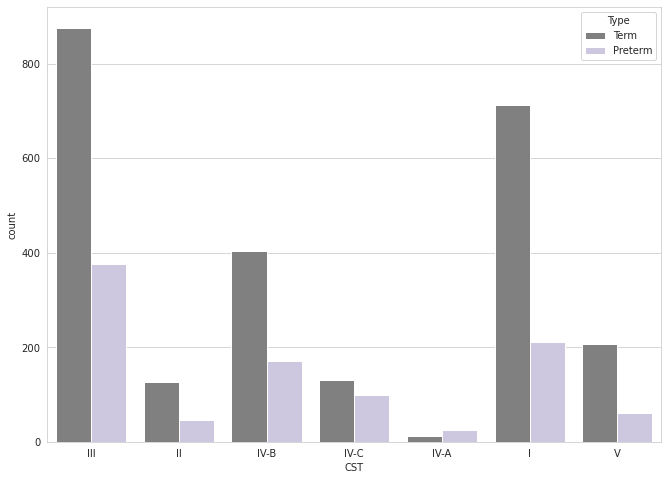

In [6]:
sns.countplot(data=cst_meta,x='CST', hue='Type', palette=my_palette)
plt.show()

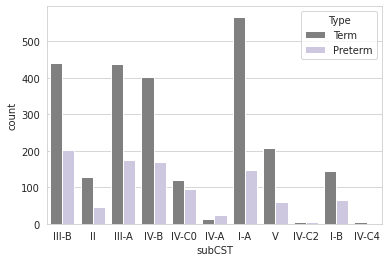

In [7]:
sns.countplot(data=cst_meta,x='subCST', hue='Type', palette = my_palette)
plt.show()

## Analyzing CST groups

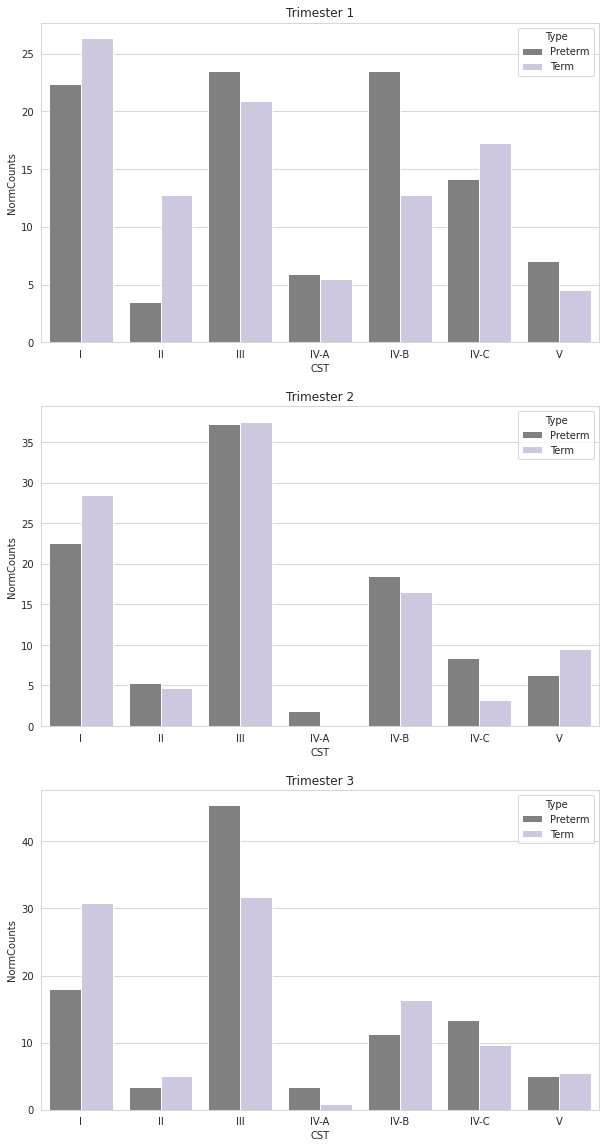

In [9]:
fig,ax = plt.subplots(
nrows = 3,
figsize = (10,20))
for t in range(1,4):
    cst_tri = cst_meta.query('trimester == @t')
    cst_df = (pd.crosstab(cst_tri.CST,cst_tri.Type,normalize='columns')*100).reset_index()
    cst_plot = pd.melt(cst_df,id_vars='CST',var_name='Type',value_name='NormCounts')
                       
    sns.barplot(data=cst_plot,x='CST',y='NormCounts',hue='Type',palette=my_palette, ax=ax[t-1])
    ax[t-1].title.set_text(f'Trimester {t}')
plt.show()

* Proportion test for all CST

In [12]:
cst_values = cst_meta['CST'].unique()

for t in range(1,4):

    print(f'Trimester {t}')

    p_value_dic = {'CST' : [],
                'P-value':[]}

    cst_df = cst_meta.query('trimester == @t')
    cst_counts = cst_df.value_counts(['CST','Type']).reset_index()
    cst_counts.columns = ['CST','Type','Count']
    display(cst_counts.sort_values('CST'))

    number_term = cst_df[cst_df['Type']=='Term'].shape[0]
    print(f'Total term samples: {number_term}')
    number_preterm = cst_df[cst_df['Type']=='Preterm'].shape[0]
    print(f'Total preterm samples: {number_preterm}')

    for i in cst_values:
        
        ivA_preterm, pretermsize = (int(cst_counts.query('CST == @i and Type == "Preterm"')['Count']),number_preterm)
        ivA_term, termsize = (int(cst_counts.query('CST == @i and Type == "Term"')['Count']),number_term)

        # check our sample against Ho for Ha != Ho
        samples = np.array([pretermsize,termsize])
        successes = np.array([ivA_preterm, ivA_term])
        stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

        p_value_dic['CST'].append(i)
        p_value_dic['P-value'].append(p_value.round(4))
    results = pd.DataFrame.from_dict(p_value_dic).sort_values('CST')
    display(results.style.applymap(highlight_cells))

Trimester 1


,CST,Type,Count
0,I,Term,29
4,I,Preterm,19
6,II,Term,14
13,II,Preterm,3
1,III,Term,23
2,III,Preterm,20
9,IV-A,Term,6
11,IV-A,Preterm,5
3,IV-B,Preterm,20
7,IV-B,Term,14


Total term samples: 110
Total preterm samples: 85


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

## Visualizing CST

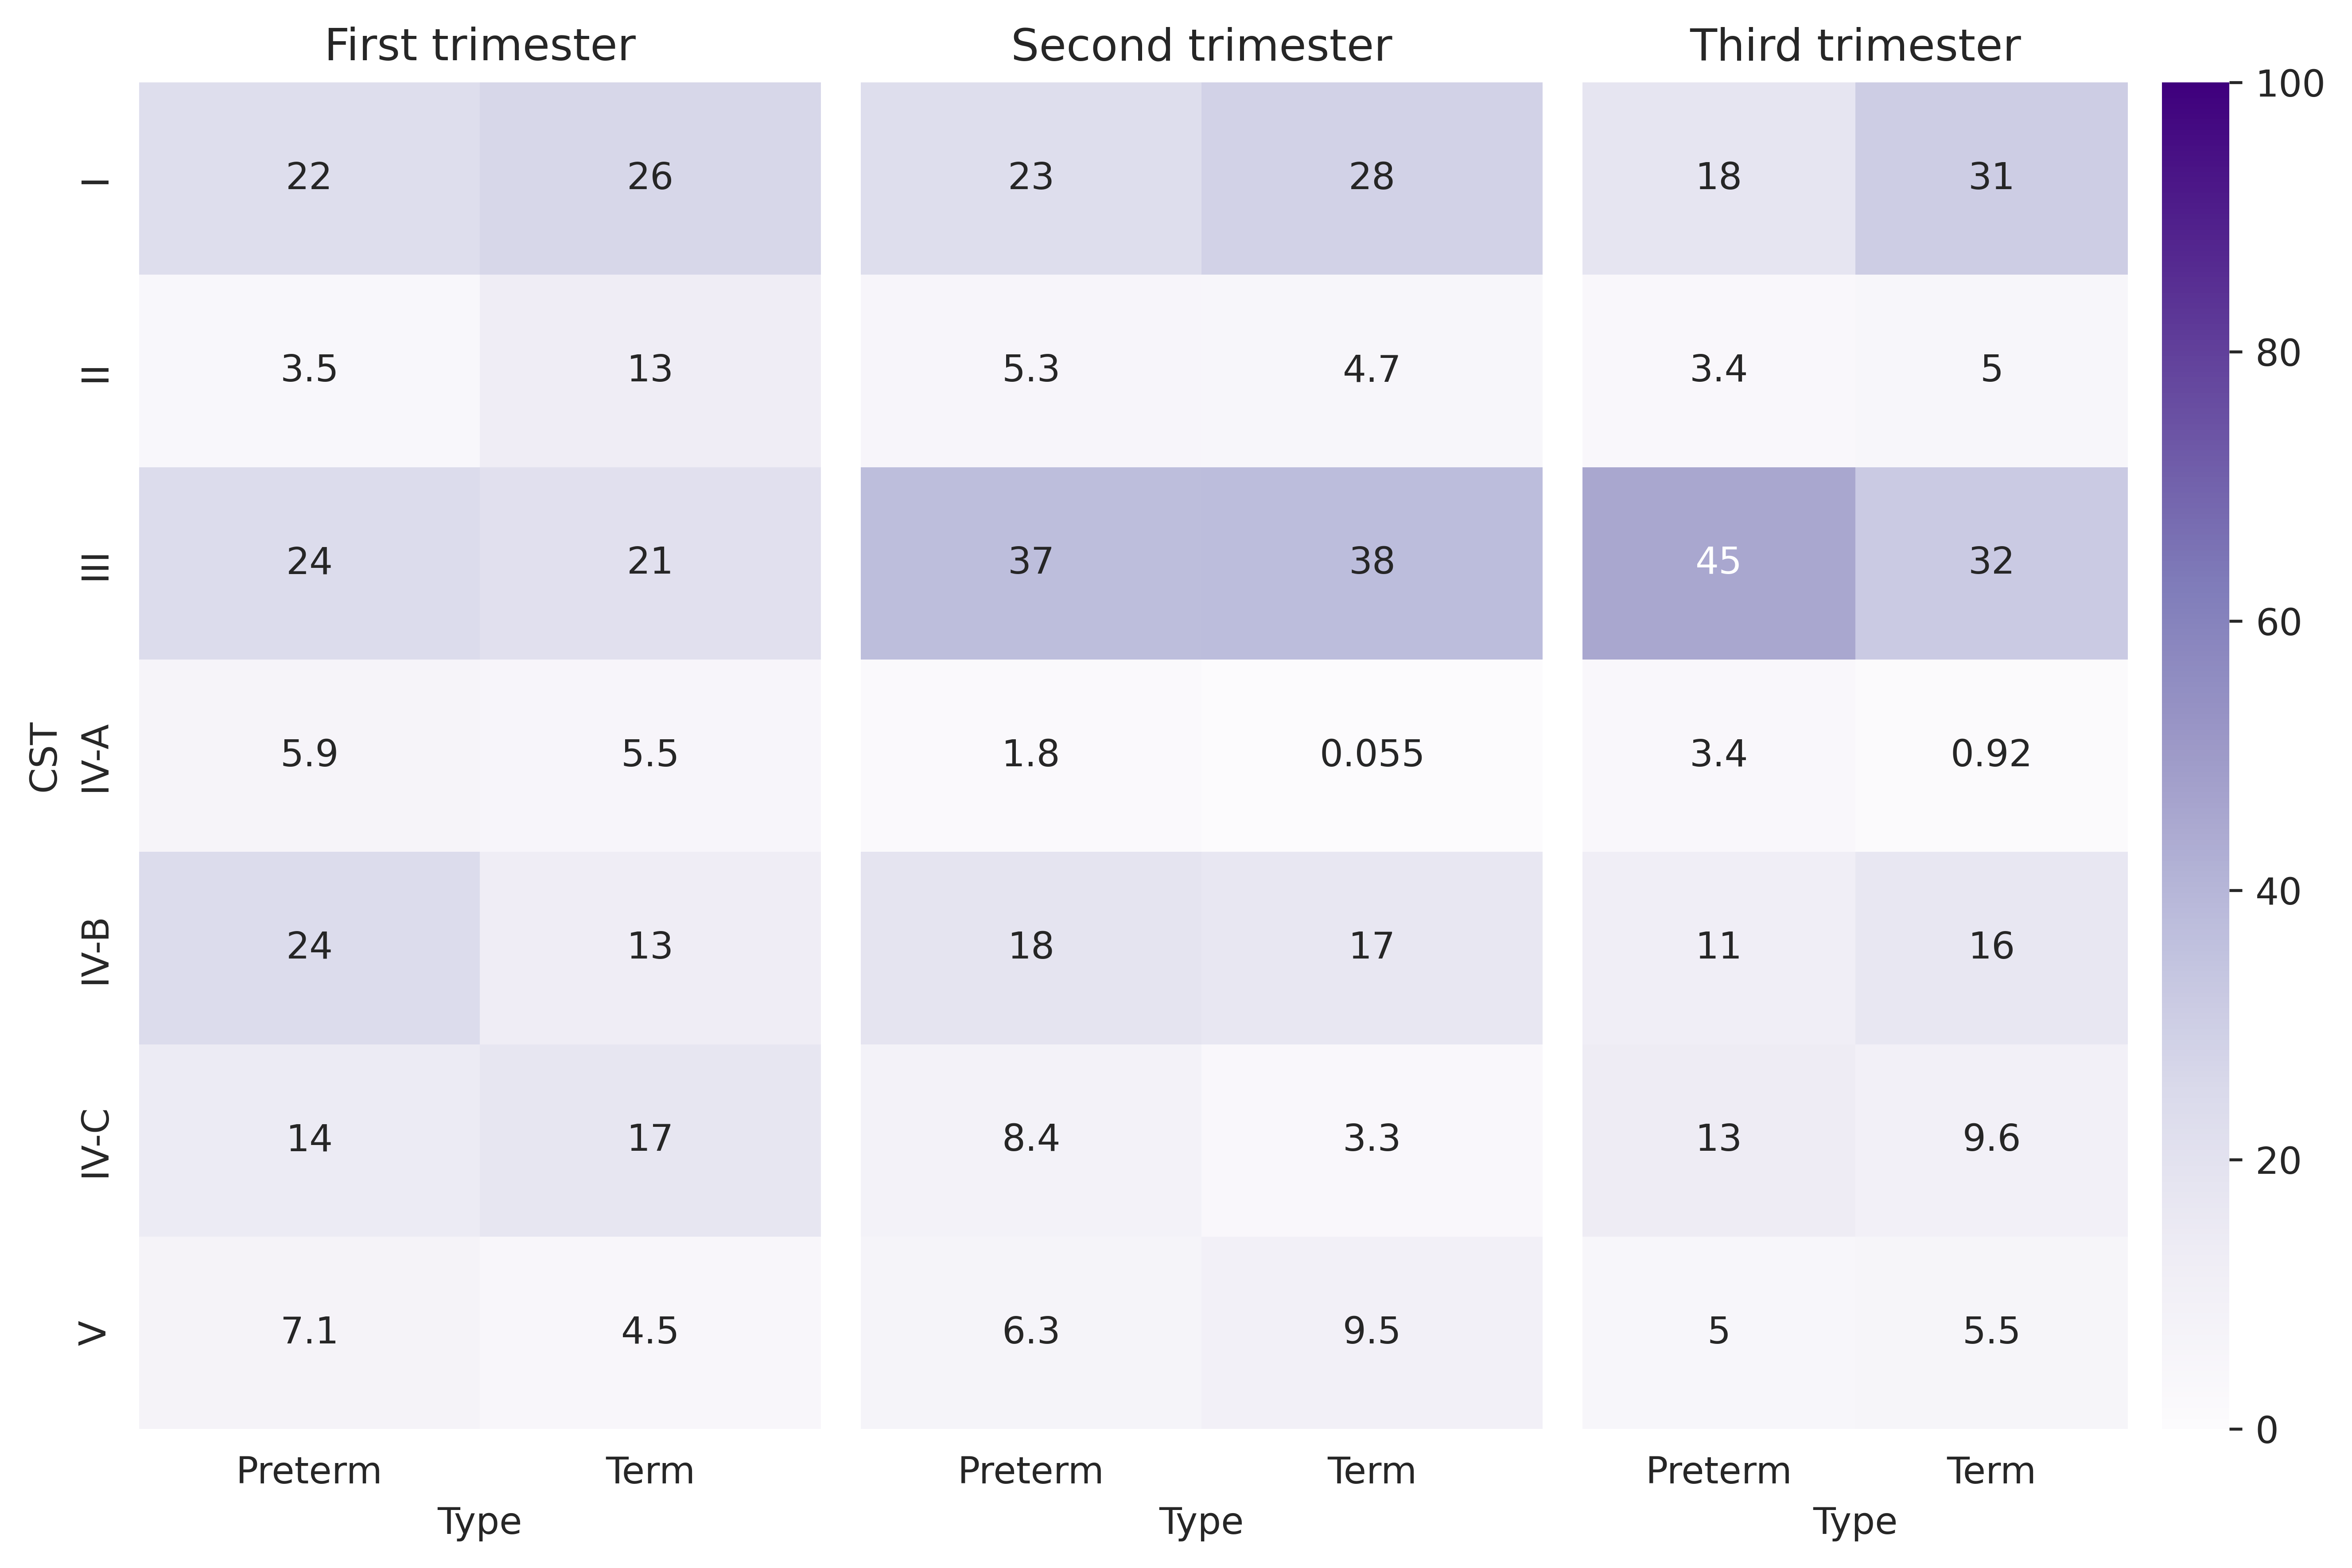

In [13]:
cst_trimester_list = []
for t in range(1,4):
    cst_tri = cst_meta.query('trimester == @t')
    cst_trimester_list.append(pd.crosstab(cst_tri.CST,cst_tri.Type, normalize='columns')*100)
    
trimesters = ['First','Second','Third']

fig, axes = plt.subplots(
    ncols=3,
    figsize=(9,6),
    sharey=True,
    dpi = 600
)
last=False

for i in range(0,3):
    if i == 2:
        last = True
    sns.heatmap(
        data=cst_trimester_list[i],
        cmap='Purples',
        vmin=0,
        vmax=100,
        ax=axes[i],
        annot = True,
        cbar=last
    )

    axes[i].set_xlabel("Type")
    axes[i].set_title(f'{trimesters[i]} trimester')
    if i != 0:
        axes[i].set_ylabel(None)

plt.tight_layout()
plt.show()

### Add early preterm information to heatmap

In [14]:
# Early preterm = delivery week < 32

cst_meta_epret = cst_meta.query('delivery_wk < 32 or delivery_wk > 36')
cst_meta_epret['Type'] = cst_meta_epret['Type'].replace('Preterm','EarlyPreterm')
cst_meta_epret.groupby('Type').count()

/tmp/ipykernel_6755/2132785133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cst_meta_epret['Type'] = cst_meta_epret['Type'].replace('Preterm','EarlyPreterm')


,CST,subCST,score,I-A_sim,I-B_sim,II_sim,III-A_sim,III-B_sim,IV-A_sim,IV-B_sim,...,was_term,delivery_wk,collect_wk,race,age,NIH Racial Category,NIH Ethnicity Category,was_preterm,was_early_preterm,trimester
Type,,,,,,,,,,,,,,,,,,,,,
EarlyPreterm,328,328,328,328,328,328,328,328,328,328,...,328,328,328,328,328,328,328,328,328,328
Term,2467,2467,2467,2467,2467,2467,2467,2467,2467,2467,...,2467,2467,2467,2467,2467,2467,2467,2467,2467,2467


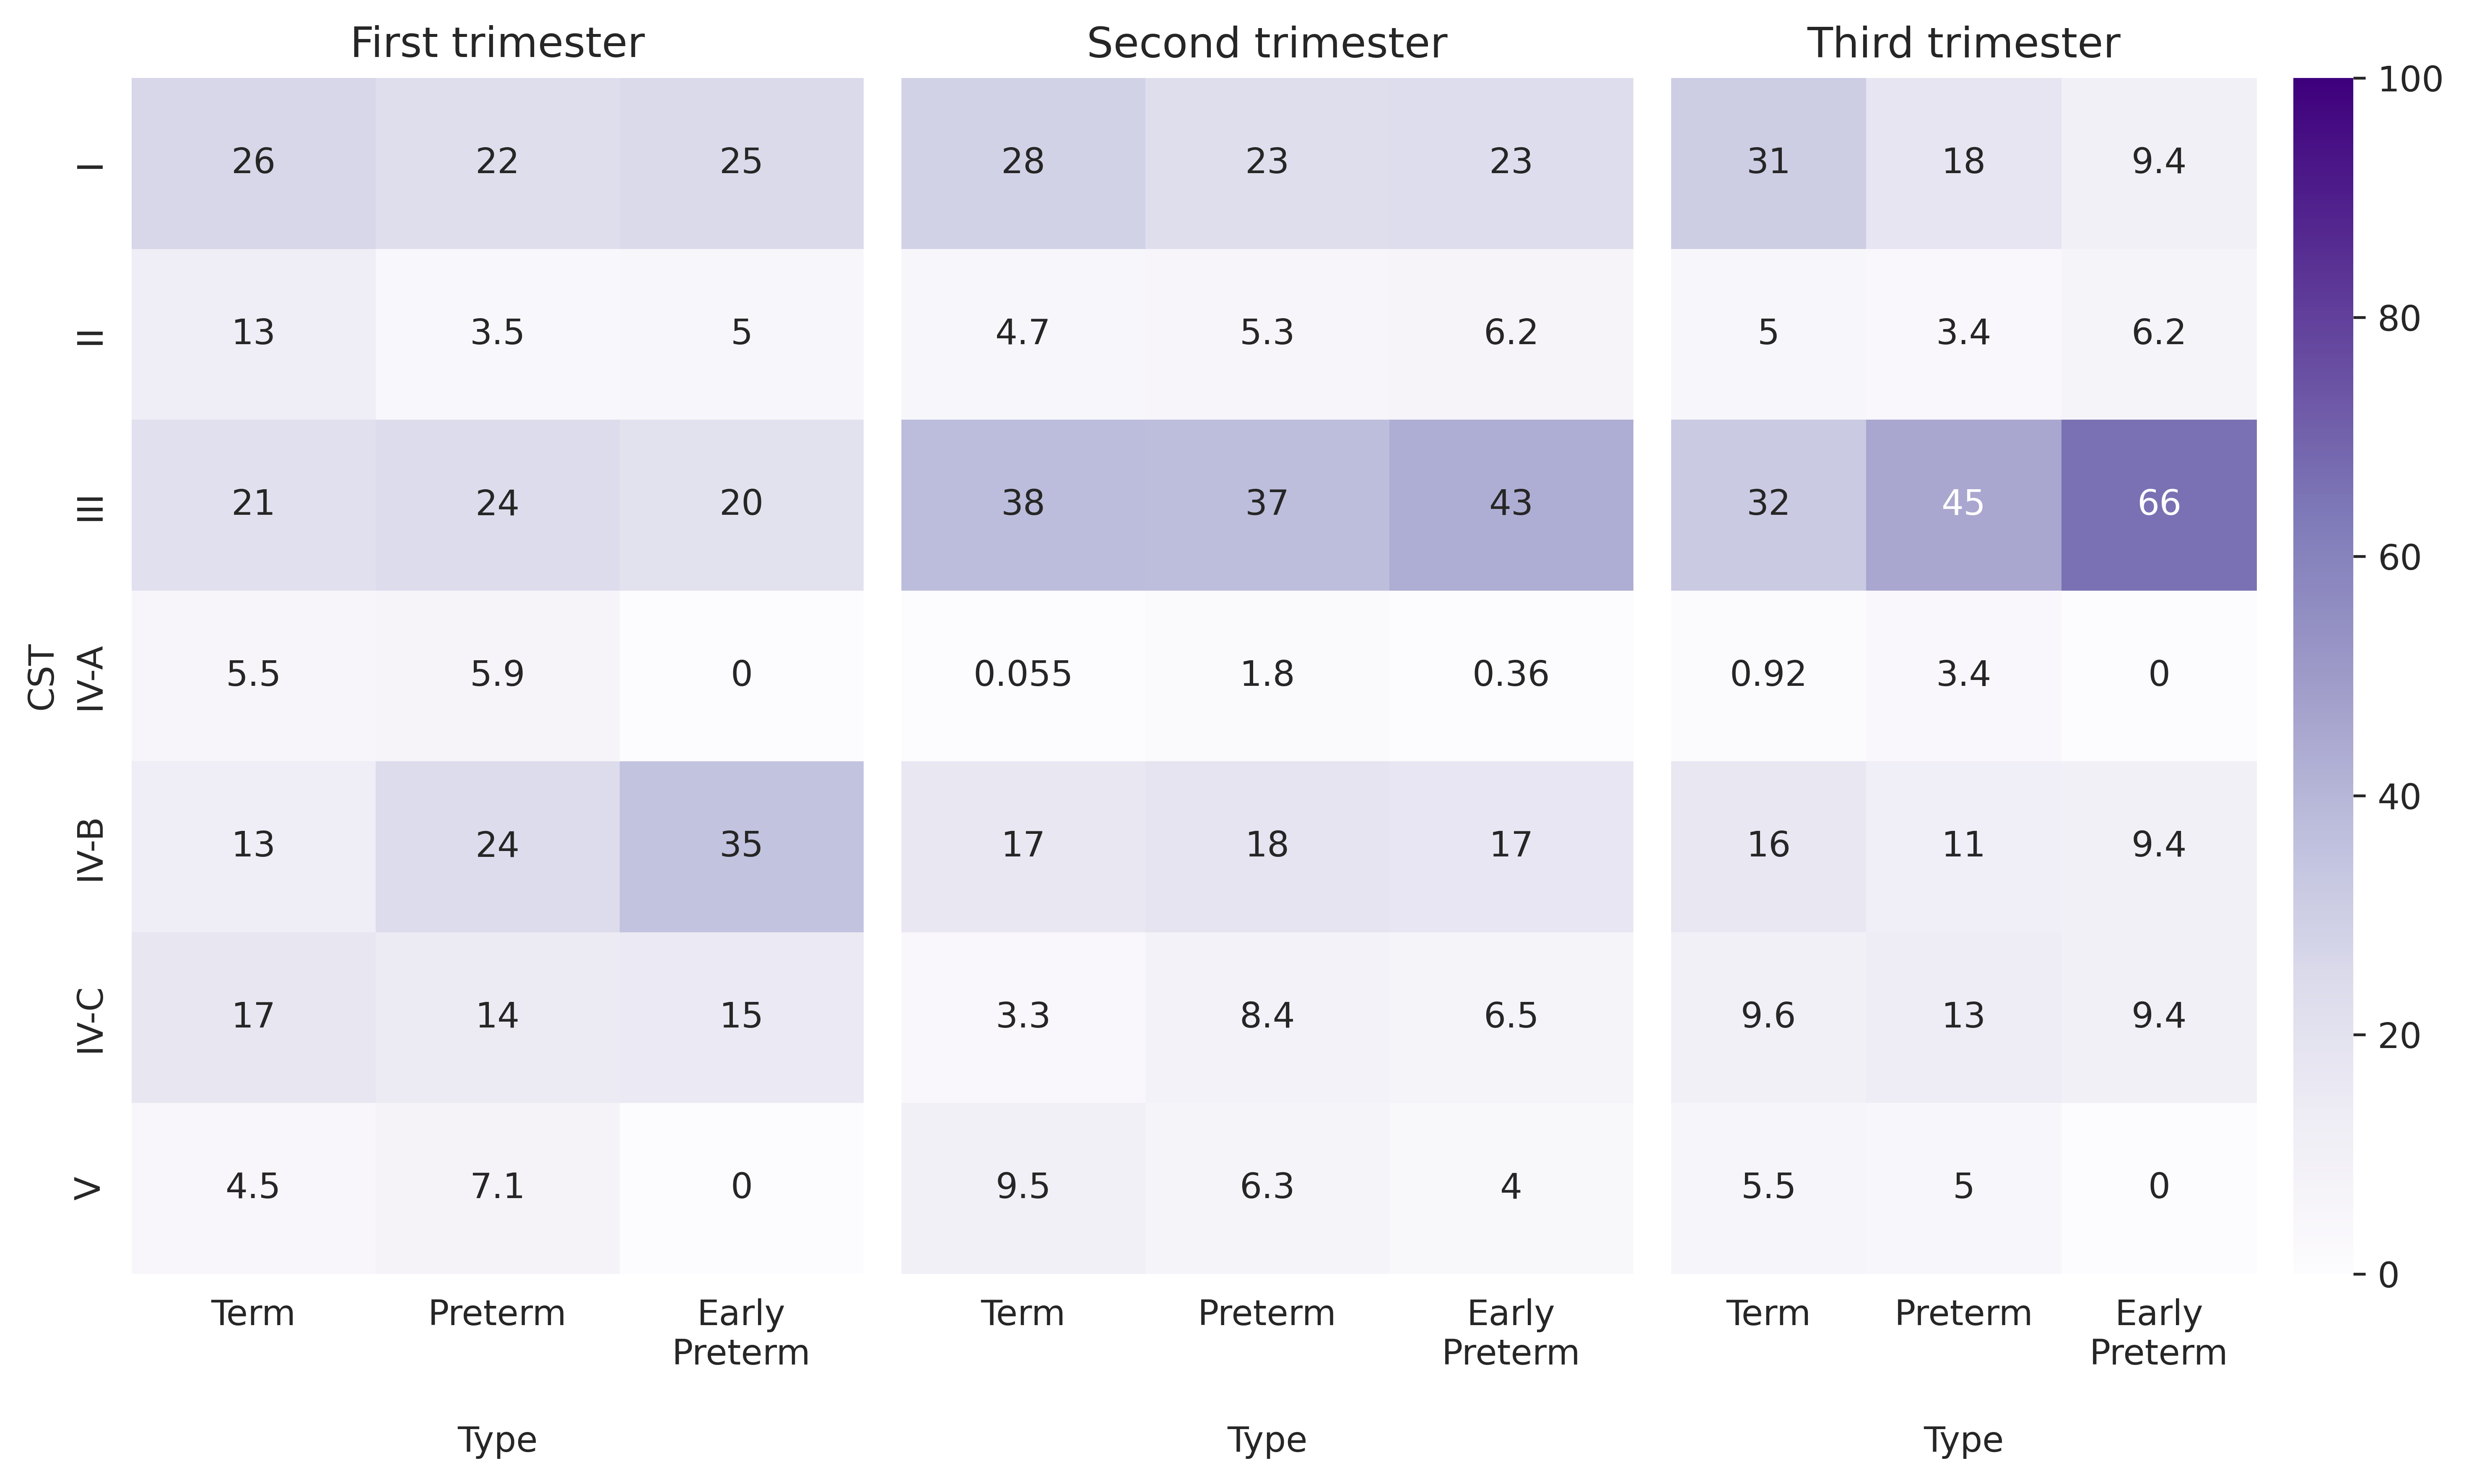

In [29]:
cst_trimester_list = []

for t in range(1,4):
    cst_tri = cst_meta.query('trimester == @t')
    cst_tri_ep = cst_meta_epret.query('trimester == @t')
    
    df_ter_pre = pd.crosstab(cst_tri.CST,cst_tri.Type, normalize='columns')*100
    df_ter_epre = pd.crosstab(cst_tri_ep.CST,cst_tri_ep.Type, normalize='columns')*100
    
    #display(pd.concat([df_ter_pre,df_ter_epre], axis=1))
    
    cst_trimester_list.append(pd.concat([df_ter_pre['Term'],df_ter_pre['Preterm'],df_ter_epre['EarlyPreterm']], axis=1))
    
trimesters = ['First','Second','Third']

fig, axes = plt.subplots(
    ncols=3,
    figsize=(10,6),
    sharey=True,
    dpi = 600
)
last=False

for i in range(0,3):
    if i == 2:
        last = True
    sns.heatmap(
        data=cst_trimester_list[i],
        cmap='Purples',
        vmin=0,
        vmax=100,
        ax=axes[i],
        annot = True,
        cbar=last,
#         mask=cst_trimester_list[i] ==0
    )
    
    labels = [item.get_text() for item in axes[i].get_xticklabels()]
    labels[2] = 'Early\nPreterm'

    axes[i].set_xticklabels(labels, rotation=0)
    axes[i].set_xlabel("\nType")
    axes[i].set_title(f'{trimesters[i]} trimester')
    if i != 0:
        axes[i].set_ylabel(None)

plt.tight_layout()
#plt.show()
plt.savefig('SuppFig3.tiff', dpi = 600)

In [22]:
cst_trimester_list = []

for t in range(1,4):
    cst_tri = cst_meta.query('trimester == @t')
    cst_tri_ep = cst_meta_epret.query('trimester == @t')
    
    df_ter_pre = pd.crosstab(cst_tri.CST,cst_tri.Type, normalize='columns')*100
    df_ter_epre = pd.crosstab(cst_tri_ep.CST,cst_tri_ep.Type, normalize='columns')*100
    
    # display(pd.concat([df_ter_pre,df_ter_epre], axis=1))
    display(pd.concat([df_ter_pre['Term'],df_ter_pre['Preterm'],df_ter_epre['EarlyPreterm']], axis=1))
    
    # cst_trimester_list.append(pd.concat([df_ter_pre['Term'],df_ter_pre['Preterm'],df_ter_epre['EarlyPreterm']], axis=1))
    

,Term,Preterm,EarlyPreterm
CST,,,
I,26.363636,22.352941,25.0
II,12.727273,3.529412,5.0
III,20.909091,23.529412,20.0
IV-A,5.454545,5.882353,0.0
IV-B,12.727273,23.529412,35.0
IV-C,17.272727,14.117647,15.0
V,4.545455,7.058824,0.0


,Term,Preterm,EarlyPreterm
CST,,,
I,28.429752,22.522523,22.826087
II,4.738292,5.255255,6.159420
III,37.520661,37.237237,43.115942
IV-A,0.055096,1.801802,0.362319
IV-B,16.528926,18.468468,17.028986
IV-C,3.250689,8.408408,6.521739
V,9.476584,6.306306,3.985507


,Term,Preterm,EarlyPreterm
CST,,,
I,30.811808,18.067227,9.375
II,4.981550,3.361345,6.250
III,31.734317,45.378151,65.625
IV-A,0.922509,3.361345,0.000
IV-B,16.420664,11.344538,9.375
IV-C,9.594096,13.445378,9.375
V,5.535055,5.042017,0.000


## Analyzing subCST groups

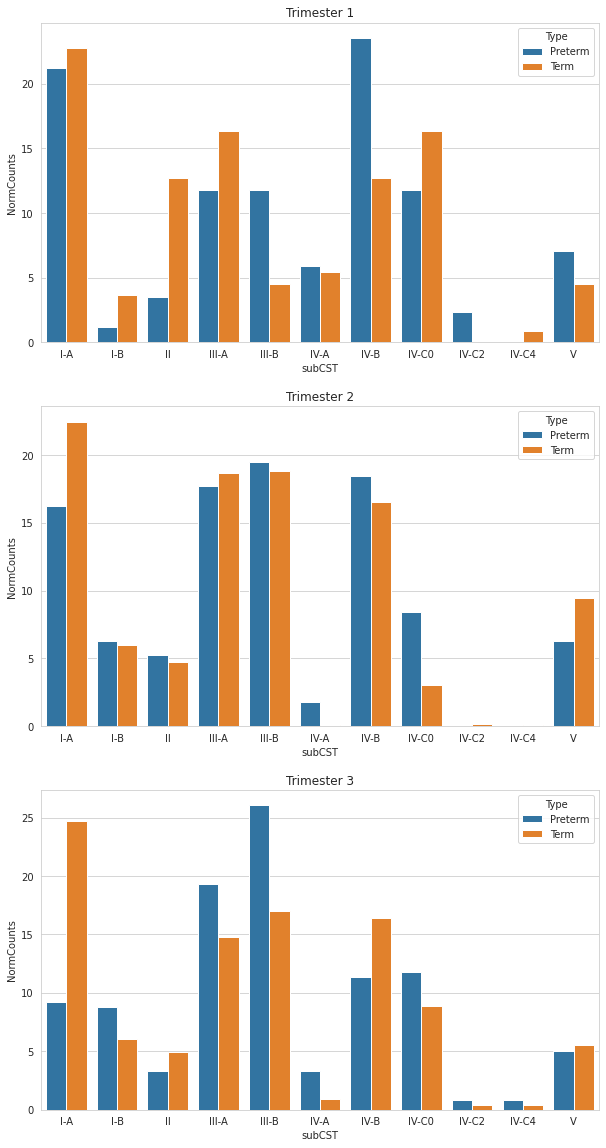

In [26]:
fig,ax = plt.subplots(
nrows = 3,
figsize = (10,20))
for t in range(1,4):
    cst_tri = cst_meta.query('trimester == @t')
    cst_df = (pd.crosstab(cst_tri.subCST,cst_tri.Type,normalize='columns')*100).reset_index()
    cst_plot = pd.melt(cst_df,id_vars='subCST',var_name='Type',value_name='NormCounts')
                       
    sns.barplot(data=cst_plot,x='subCST',y='NormCounts',hue='Type',palette=my_palette, ax=ax[t-1])
    ax[t-1].title.set_text(f'Trimester {t}')
plt.show()

* Proportion test for all subCST

In [28]:
# Proportion z test
subcst_values = cst_meta['subCST'].unique()

for t in range(1,4):

    print(f'Trimester {t}')

    p_value_dic = {'subCST' : [],
                'P-value':[]}

    cst_df = cst_meta.query('trimester == @t')
    cst_counts = cst_df.value_counts(['subCST','Type']).reset_index()
    cst_counts.columns = ['subCST','Type','Count']
    display(cst_counts.sort_values('subCST'))

    number_term = cst_df[cst_df['Type']=='Term'].shape[0]
    print(f'Total term samples: {number_term}')
    number_preterm = cst_df[cst_df['Type']=='Preterm'].shape[0]
    print(f'Total preterm samples: {number_preterm}')

    for i in subcst_values:
        
        check_preterm = cst_counts.query('subCST == @i and Type == "Preterm"')
        check_term = cst_counts.query('subCST == @i and Type == "Term"')
        
        if check_preterm.shape[0] > 0 and check_term.shape[0] > 0 :
        
            ivA_preterm, pretermsize = (int(cst_counts.query('subCST == @i and Type == "Preterm"')['Count']),number_preterm)
            ivA_term, termsize = (int(cst_counts.query('subCST == @i and Type == "Term"')['Count']),number_term)

            # check our sample against Ho for Ha != Ho
            samples = np.array([pretermsize,termsize])
            successes = np.array([ivA_preterm, ivA_term])
            stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

            p_value_dic['subCST'].append(i)
            p_value_dic['P-value'].append(p_value.round(4))
            
        else:
            print(f'SubCST {i} does not exist in trimester {t}')

    results = pd.DataFrame.from_dict(p_value_dic).sort_values('subCST')
    display(results.style.applymap(highlight_cells))

Trimester 1


,subCST,Type,Count
0,I-A,Term,25
2,I-A,Preterm,18
15,I-B,Term,4
19,I-B,Preterm,1
5,II,Term,14
16,II,Preterm,3
4,III-A,Term,18
8,III-A,Preterm,10
13,III-B,Term,5
9,III-B,Preterm,10


Total term samples: 110
Total preterm samples: 85
SubCST IV-C2 does not exist in trimester 1
SubCST IV-C4 does not exist in trimester 1


,subCST,P-value
6,I-A,0.795600
8,I-B,0.281200
1,II,0.024000
2,III-A,0.363800
0,III-B,0.060700
5,IV-A,0.897800
3,IV-B,0.048700
4,IV-C0,0.363800
7,V,0.450600


Trimester 2


,subCST,Type,Count
0,I-A,Term,408
8,I-A,Preterm,108
13,I-B,Preterm,42
9,I-B,Term,108
10,II,Term,86
15,II,Preterm,35
7,III-A,Preterm,118
2,III-A,Term,339
5,III-B,Preterm,130
1,III-B,Term,342


Total term samples: 1815
Total preterm samples: 666
SubCST IV-C2 does not exist in trimester 2
SubCST IV-C4 does not exist in trimester 2


,subCST,P-value
6,I-A,0.000700
8,I-B,0.741700
1,II,0.596300
2,III-A,0.584600
0,III-B,0.703600
5,IV-A,0.000000
3,IV-B,0.255000
4,IV-C0,0.000000
7,V,0.012700


Trimester 3


,subCST,Type,Count
0,I-A,Term,134
12,I-A,Preterm,22
7,I-B,Term,33
13,I-B,Preterm,21
16,II,Preterm,8
11,II,Term,27
3,III-A,Term,80
6,III-A,Preterm,46
1,III-B,Term,92
4,III-B,Preterm,62


Total term samples: 542
Total preterm samples: 238


,subCST,P-value
6,I-A,0.000000
9,I-B,0.165900
1,II,0.314200
2,III-A,0.110500
0,III-B,0.003400
5,IV-A,0.014300
3,IV-B,0.066600
4,IV-C0,0.207200
8,IV-C2,0.396100
10,IV-C4,0.396100


## Visualising subCST

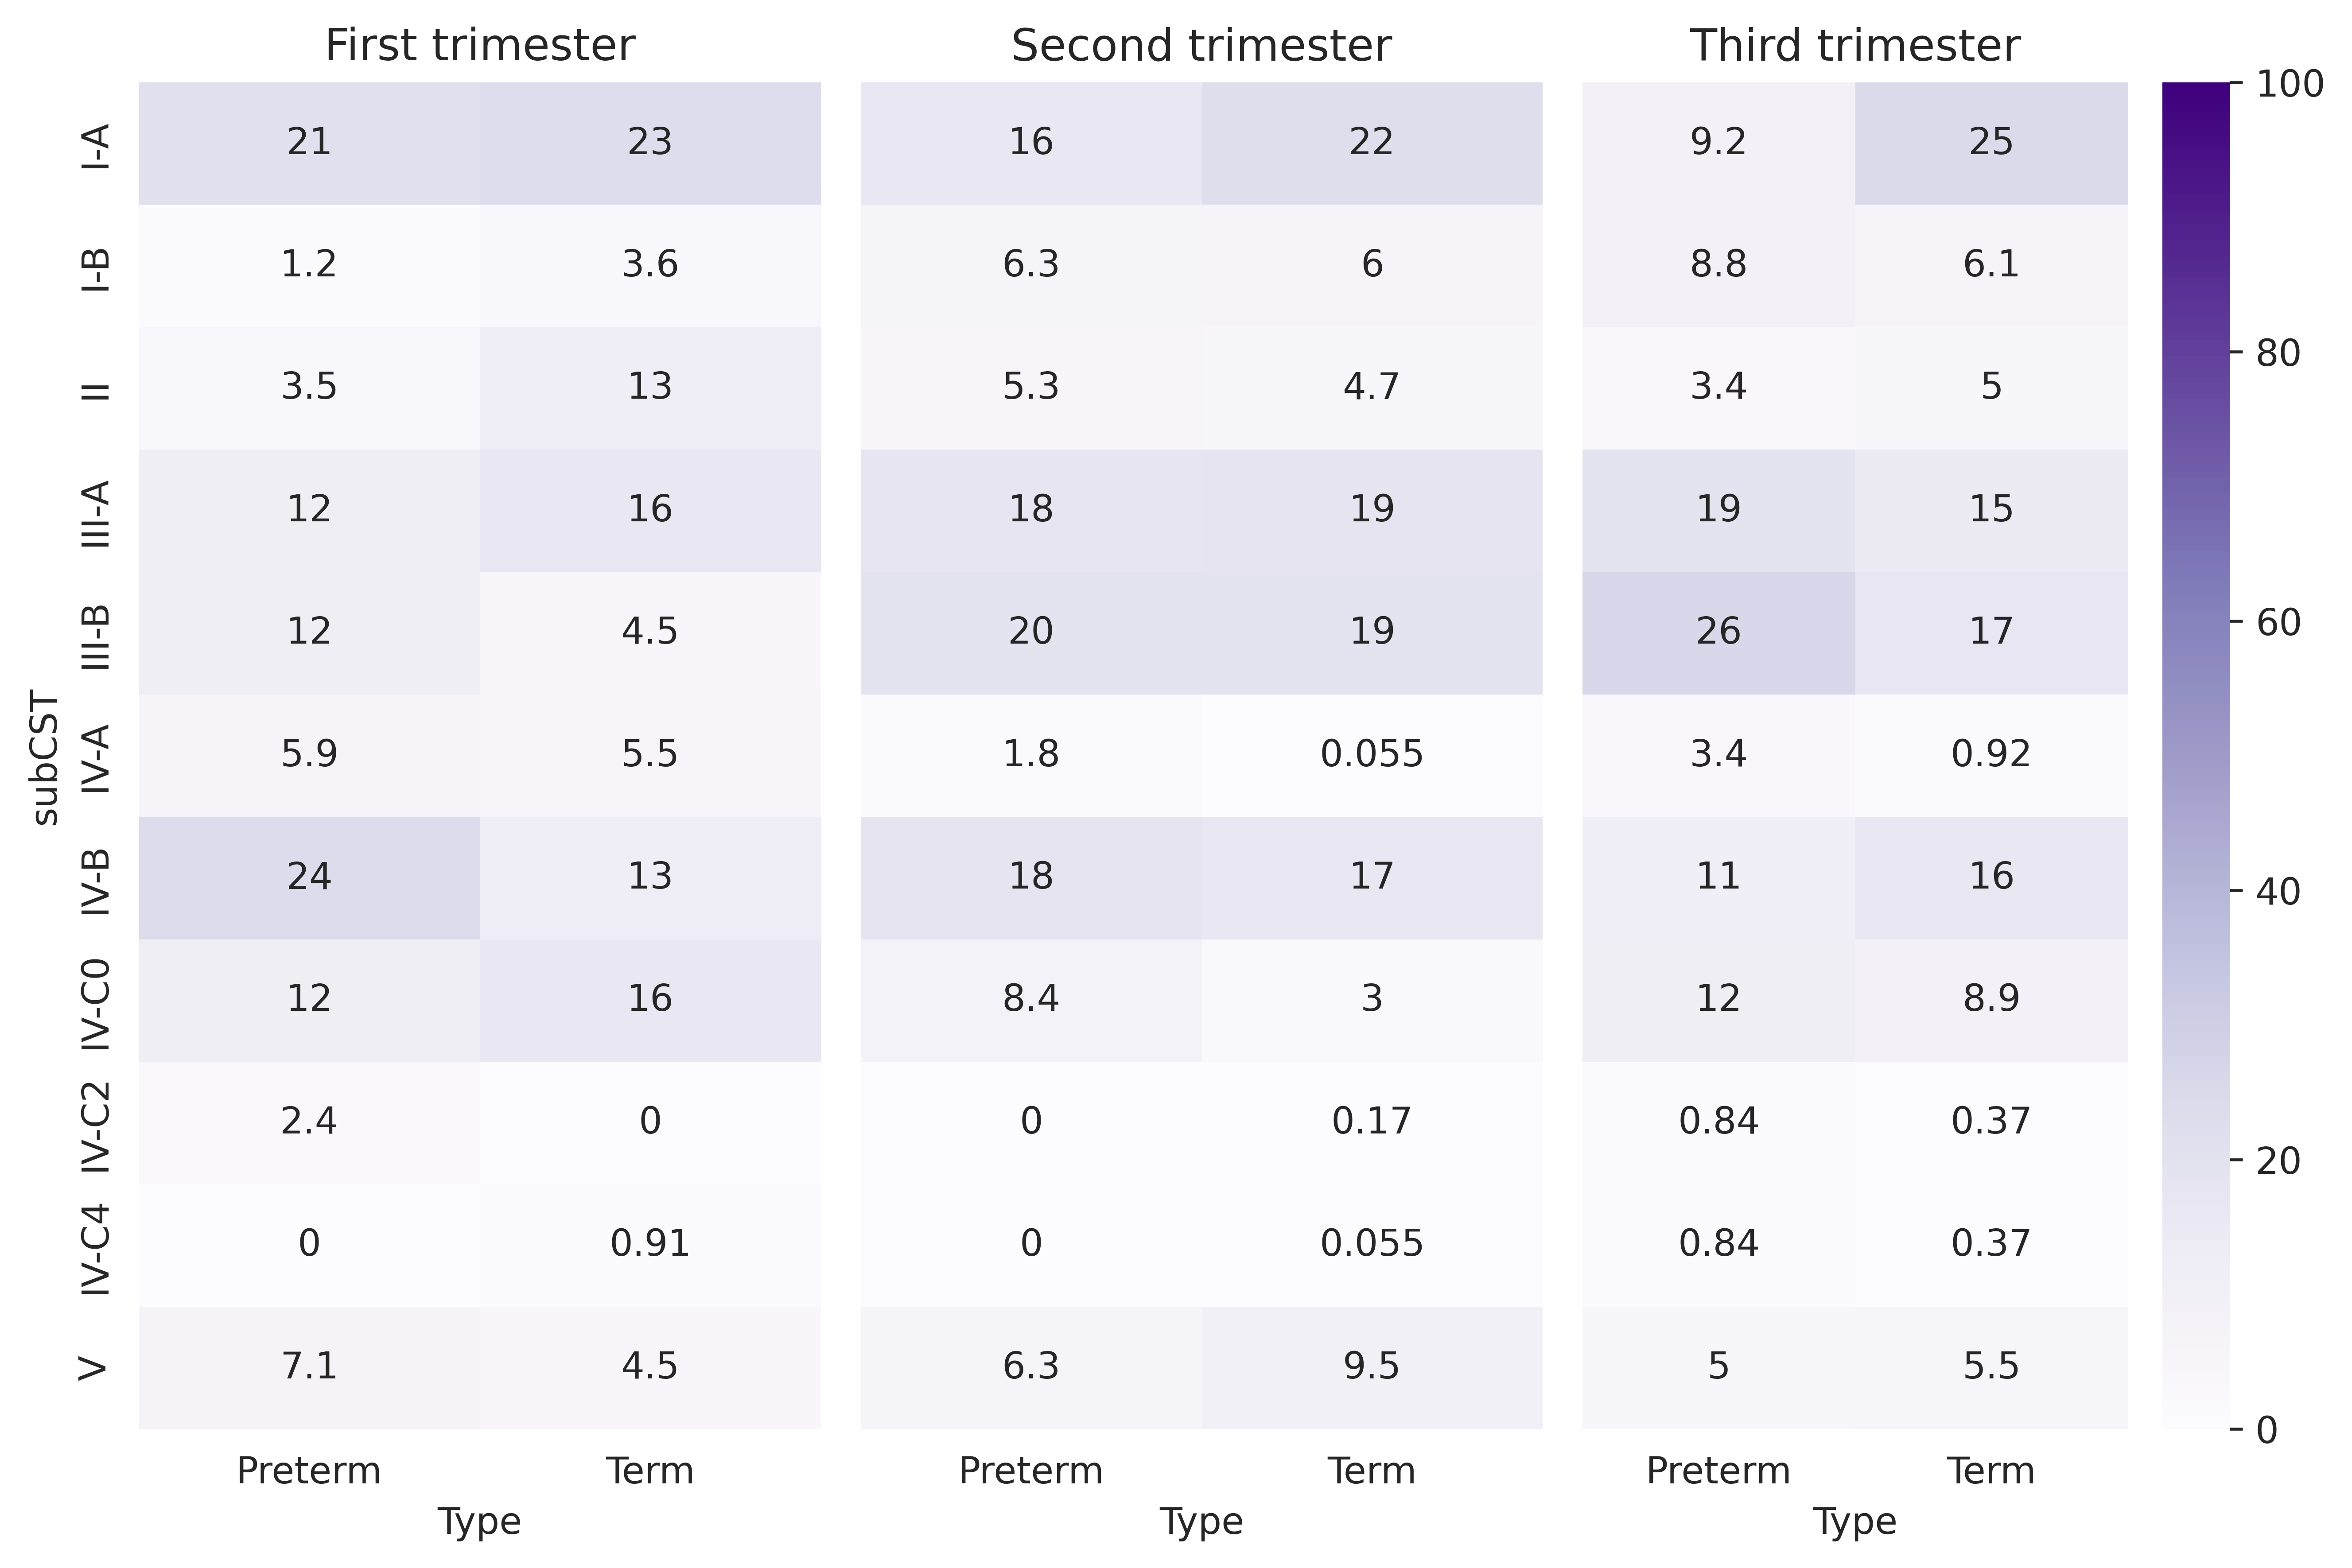

In [30]:
subcst_trimester_list = []
for t in range(1,4):
    cst_tri = cst_meta.query('trimester == @t')
    subcst_trimester_list.append(pd.crosstab(cst_tri.subCST,cst_tri.Type, normalize='columns')*100)
    
trimesters = ['First','Second','Third']

fig, axes = plt.subplots(
    ncols=3,
    figsize=(9,6),
    sharey=True,
    dpi = 600
)
last=False

for i in range(0,3):
    if i == 2:
        last = True
    sns.heatmap(
        data=subcst_trimester_list[i],
        cmap='Purples',
        vmin=0,
        vmax=100,
        ax=axes[i],
        annot = True,
        cbar=last
    )

    axes[i].set_xlabel("Type")
    axes[i].set_title(f'{trimesters[i]} trimester')
    if i != 0:
        axes[i].set_ylabel(None)

plt.tight_layout()
plt.show()

## Alluvia plot DataFrame

In [34]:
# Participant with at least one samples in different trimesters.

dup = {}
to_keep = []
for p in pd.unique(cst_meta.participant_id):
    dup[p] = pd.unique(cst_meta.loc[cst_meta.participant_id == p,"trimester"])
    if len(dup[p]) > 1:
        to_keep.append(p)

print(len(to_keep))
cst_2_trim = cst_meta.query('participant_id in @to_keep')

290


In [35]:

my_list = []
for t in range(1,4):
    cst_trimester = cst_2_trim.query('trimester == @t')

    dup = {}
    
    for index,row in cst_trimester.iterrows():
        if row.participant_id not in dup.keys():
            dup[row.participant_id] = (row.collect_wk,row["specimen.1"])
        else:
            if row.collect_wk > dup[row.participant_id][0]:
                dup[row.participant_id] = (row.collect_wk, row["specimen.1"])

    my_index = [i[1] for i in dup.values()] 
    cst_trimester_final = cst_trimester.query('index in @my_index')
    my_list.append(cst_trimester_final)

cst_alluvia = pd.concat(my_list,axis=0).sort_index()
cst_alluvia

,CST,subCST,score,I-A_sim,I-B_sim,II_sim,III-A_sim,III-B_sim,IV-A_sim,IV-B_sim,...,specimen.1,participant_id,Type,delivery_wk,collect_wk,race,age,NIH Racial Category,NIH Ethnicity Category,trimester
specimen,,,,,,,,,,,,,,,,,,,,,
A00005-02,II,II,0.881327,6.552427e-04,1.424446e-02,8.813266e-01,3.380941e-03,4.298647e-03,0.000452,0.002741,...,A00005-02,A00005,Term,41.0,26.0,White,Unknown,White,Unknown,2
A00005-16,II,II,0.847904,6.800546e-04,1.408241e-02,8.479043e-01,3.184385e-03,3.834962e-03,0.000335,0.002341,...,A00005-16,A00005,Term,41.0,40.0,White,Unknown,White,Unknown,3
A00008-08,IV-B,IV-B,0.028636,3.805667e-05,6.790990e-04,3.571163e-03,7.732308e-04,4.448139e-03,0.015895,0.028636,...,A00008-08,A00008,Preterm,35.0,26.0,White,Unknown,White,Unknown,2
A00008-17,III,III-B,0.714212,1.976844e-03,3.829926e-02,4.212670e-02,6.950696e-01,7.142119e-01,0.056925,0.122878,...,A00008-17,A00008,Preterm,35.0,33.0,White,Unknown,White,Unknown,3
A00009-04,IV-C,IV-C0,0.000008,5.706649e-08,3.151065e-07,2.299553e-07,1.727463e-07,6.424943e-07,0.000004,0.000001,...,A00009-04,A00009,Term,37.0,25.0,Asian-Unspecified,Unknown,Asian,Unknown,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H00223-03,III,III-A,0.989631,2.449665e-03,4.247862e-02,4.525338e-02,9.896310e-01,7.744859e-01,0.050808,0.109048,...,H00223-03,H00223,Preterm,36.0,28.0,african_american,Above_38,Black or African American,Unknown,3
H00224-01,IV-B,IV-B,0.517877,1.262859e-03,2.396549e-02,6.215325e-02,2.354888e-01,3.357424e-01,0.229159,0.517877,...,H00224-01,H00224,Term,39.0,18.0,african_american,18_to_28,Black or African American,Unknown,2
H00224-04,III,III-A,0.993900,2.450051e-03,4.301858e-02,4.597310e-02,9.939001e-01,7.983855e-01,0.052780,0.112964,...,H00224-04,H00224,Term,39.0,38.0,african_american,18_to_28,Black or African American,Unknown,3


In [26]:
cst_alluvia.to_csv('outputs/cst2alluvia.csv',sep=",")

In [33]:
display(cst_meta.query('trimester == 1 and CST == "II"'))
cst_meta.query('participant_id == "D00081"')

,CST,subCST,score,I-A_sim,I-B_sim,II_sim,III-A_sim,III-B_sim,IV-A_sim,IV-B_sim,...,specimen.1,participant_id,Type,delivery_wk,collect_wk,race,age,NIH Racial Category,NIH Ethnicity Category,trimester
specimen,,,,,,,,,,,,,,,,,,,,,
D00081-01,II,II,0.922218,0.000684,0.014736,0.922218,0.003186,0.004239,0.001577,0.004426,...,D00081-01,D00081,Term,38.0,9.0,Caucasian,30,White,Unknown,1
D00081-02,II,II,0.835970,0.001002,0.014306,0.835970,0.003180,0.003859,0.000328,0.002311,...,D00081-02,D00081,Term,38.0,10.0,Caucasian,30,White,Unknown,1


In [28]:
cst_alluvia.query('trimester == 1 and CST == "II"')

,CST,subCST,score,I-A_sim,I-B_sim,II_sim,III-A_sim,III-B_sim,IV-A_sim,IV-B_sim,...,specimen.1,participant_id,Type,delivery_wk,collect_wk,race,age,NIH Racial Category,NIH Ethnicity Category,trimester
specimen,,,,,,,,,,,,,,,,,,,,,
A00018-02,II,II,0.005343,1.385420e-05,0.000256,0.005343,0.000702,0.000926,7.956450e-04,0.001410,...,A00018-02,A00018,Term,39.0,11.0,White,Unknown,White,Unknown,1
A00033-01,II,II,0.001816,3.227442e-06,0.000057,0.001816,0.000012,0.000019,7.494243e-06,0.000017,...,A00033-01,A00033,Term,37.0,13.0,Other (Specify below),Unknown,Unknown,Unknown,1
A00034-10,II,II,0.858674,6.802487e-04,0.014162,0.858674,0.003188,0.003866,3.464969e-04,0.002385,...,A00034-10,A00034,Term,37.0,10.0,White,Unknown,White,Unknown,1
D00016-01,II,II,0.838649,6.798301e-04,0.014014,0.838649,0.003181,0.003809,3.287181e-04,0.002313,...,D00016-01,D00016,Preterm,25.0,10.0,Asian,40,Asian,Unknown,1
D00029-01,II,II,0.845236,1.189252e-03,0.014608,0.845236,0.003829,0.004487,4.029647e-04,0.002487,...,D00029-01,D00029,Preterm,35.0,13.0,Asian,23,Asian,Unknown,1
D00088-02,II,II,0.860230,6.800915e-04,0.014171,0.860230,0.003188,0.003870,3.380774e-04,0.002379,...,D00088-02,D00088,Term,40.0,13.0,Caucasian,34,White,Unknown,1
D00098-03,II,II,0.855725,6.798017e-04,0.014138,0.855725,0.003186,0.003857,3.361683e-04,0.002365,...,D00098-03,D00098,Term,40.0,12.0,Asian,29,Asian,Unknown,1
E00024-01,II,II,0.000346,4.574951e-07,0.000010,0.000346,0.000002,0.000003,2.869565e-07,0.000002,...,E00024-01,E00024,Term,38.0,10.0,More than one race,29,Unknown,Unknown,1


## Heatmap visualization CST alluvial

In [43]:
cst_trimester_list = []
for t in range(1,4):
    cst_tri= cst_alluvia.query('trimester == @t')#.query('collect_wk >= 6 and collect_wk <= 36')
    cst_trimester_list.append(pd.crosstab(cst_tri.CST,cst_tri.Type, normalize='columns')*100)

Type,Preterm,Term
CST,,
I,12,14
II,2,6
III,10,13
IV-A,2,4
IV-B,8,13
IV-C,6,15
V,3,3


Type,Preterm,Term
CST,,
I,14,48
II,6,10
III,31,44
IV-A,3,1
IV-B,14,39
IV-C,16,29
V,4,11


Type,Preterm,Term
CST,,
I,12,66
II,3,8
III,29,49
IV-A,1,1
IV-B,10,35
IV-C,16,26
V,4,6


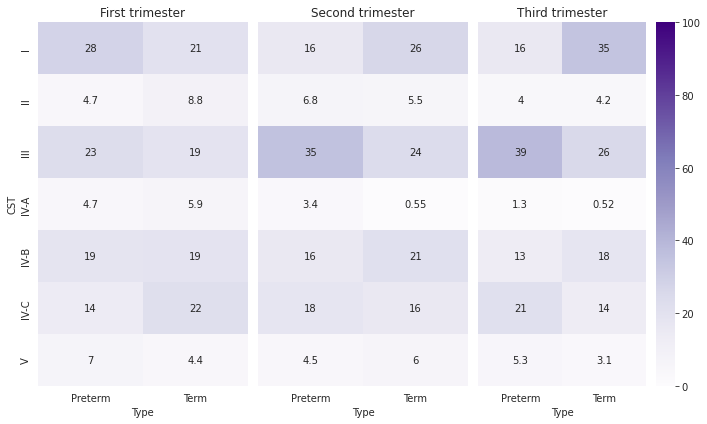

In [42]:
trimesters = ['First','Second','Third']
fig, axes = plt.subplots(
    ncols=3,
    figsize=(10,6),
    sharey=True,
)
last=False

for i in range(0,3):
    if i == 2:
        last = True
    sns.heatmap(
        data=cst_trimester_list[i],
        cmap='Purples',
        vmin=0,
        vmax=100,
        ax=axes[i],
        annot = True,
        cbar=last
    )

    axes[i].set_xlabel("Type")
    axes[i].set_title(f'{trimesters[i]} trimester')
    if i != 0:
        axes[i].set_ylabel(None)

plt.tight_layout()
plt.show()

## Statitstical test for CST alluvial

We only selecte participant with at least two samples in different trimester and take the last one if it is duplicated inside the trimester.

### Proportion test CST

In [47]:
cst_values = cst_alluvia['CST'].unique()

for t in range(1,4):

    print(f'Trimester {t}')

    p_value_dic = {'CST' : [],
                'P-value':[]}

    cst_df = cst_alluvia.query('trimester == @t')#.query('collect_wk >= 6 and collect_wk <= 36')
    cst_counts = cst_df.value_counts(['CST','Type']).reset_index()
    cst_counts.columns = ['CST','Type','Count']
    display(cst_counts.sort_values('CST'))

    number_term = cst_df[cst_df['Type']=='Term'].shape[0]
    print(f'Total term samples: {number_term}')
    number_preterm = cst_df[cst_df['Type']=='Preterm'].shape[0]
    print(f'Total preterm samples: {number_preterm}')

    for i in cst_values:
        
        ivA_preterm, pretermsize = (int(cst_counts.query('CST == @i and Type == "Preterm"')['Count']),number_preterm)
        ivA_term, termsize = (int(cst_counts.query('CST == @i and Type == "Term"')['Count']),number_term)

        # check our sample against Ho for Ha != Ho
        samples = np.array([pretermsize,termsize])
        successes = np.array([ivA_preterm, ivA_term])
        stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

        p_value_dic['CST'].append(i)
        p_value_dic['P-value'].append(p_value.round(4))

    display(pd.DataFrame.from_dict(p_value_dic).sort_values('CST'))

Trimester 1


,CST,Type,Count
1,I,Term,14
3,I,Preterm,12
7,II,Term,6
12,II,Preterm,2
2,III,Term,13
5,III,Preterm,10
9,IV-A,Term,4
13,IV-A,Preterm,2
4,IV-B,Term,12
6,IV-B,Preterm,8


Total term samples: 67
Total preterm samples: 43


,CST,P-value
4,I,0.3983
0,II,0.3963
2,III,0.6278
6,IV-A,0.7663
1,IV-B,0.9266
3,IV-C,0.2721
5,V,0.5733


Trimester 2


,CST,Type,Count
0,I,Term,48
6,I,Preterm,14
9,II,Term,10
10,II,Preterm,6
1,III,Term,44
3,III,Preterm,31
12,IV-A,Preterm,3
13,IV-A,Term,1
2,IV-B,Term,39
7,IV-B,Preterm,14


Total term samples: 182
Total preterm samples: 88


,CST,P-value
4,I,0.0553
0,II,0.6659
2,III,0.0574
6,IV-A,0.0683
1,IV-B,0.2845
3,IV-C,0.6423
5,V,0.6144


Trimester 3


,CST,Type,Count
0,I,Term,50
6,I,Preterm,12
8,II,Term,4
11,II,Preterm,3
1,III,Preterm,29
2,III,Term,26
12,IV-A,Preterm,1
13,IV-A,Term,1
3,IV-B,Term,22
7,IV-B,Preterm,10


Total term samples: 128
Total preterm samples: 75


,CST,P-value
4,I,0.0006
0,II,0.7416
2,III,0.0045
6,IV-A,0.7007
1,IV-B,0.4670
3,IV-C,0.3801
5,V,0.4351


In [40]:
cst_tri= cst_alluvia.query('trimester == 3')#.query('collect_wk >= 6 and collect_wk <= 36')
pd.crosstab(cst_tri.CST,cst_tri.Type)

Type,Preterm,Term
CST,,
I,12,66
II,3,8
III,29,49
IV-A,1,1
IV-B,10,35
IV-C,16,26
V,4,6
